
# Project: Investigate a Dataset - No-show Appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.
All 14 Columns in the table are listed and briefly described below:
>'PatientID' - this uniquely identifies each patients

>'AppointmentID' - this uniquely identifies each patient's visit

>'Gender' - Patient's sex

>'ScheduledDay' - Date patients appointment was scheduled.

>'AppointmentDay' - Patients appointment date and time

>'Age' - Patient's age

>'Neighbourhood' - Patients neighbourhood

>'Scholarship' - Patient's scholarship status

>'Hipertension' - Patient's Hipertensive status

>'Diabetes' - Patient's diabetes status

>'Alcoholism' - Does the the patient drinks alcohol or not

>'Handcap' - Any body impairment

>'SMS_received' - Was SMS notification received for the appointment

>'No-show' - Did patient showed up for the appointment or not.


### Question(s) for Analysis
> Does scholarship enrollment make patients show up for appointments

> Are patients aware/reminded of their medical appointments.


In [25]:
# Import statements for required packages.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as  sns
% matplotlib inline


In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

    100% |████████████████████████████████| 10.5MB 3.9MB/s eta 0:00:01   10% |███▎                            | 1.1MB 24.7MB/s eta 0:00:01    59% |███████████████████▏            | 6.2MB 26.3MB/s eta 0:00:01
    100% |████████████████████████████████| 13.4MB 3.1MB/s eta 0:00:01 0% |▏                               | 71kB 20.4MB/s eta 0:00:01    10% |███▍                            | 1.4MB 26.8MB/s eta 0:00:01    20% |██████▋                         | 2.8MB 26.6MB/s eta 0:00:01    37% |████████████▏                   | 5.1MB 25.9MB/s eta 0:00:01    47% |███████████████▎                | 6.4MB 26.7MB/s eta 0:00:01    67% |█████████████████████▌          | 9.0MB 26.1MB/s eta 0:00:01    76% |████████████████████████▋       | 10.3MB 26.0MB/s eta 0:00:01    86% |███████████████████████████▊    | 11.6MB 26.5MB/s eta 0:00:01    96% |██████████████████████████████▉ | 12.9MB 26.8MB/s eta 0:00:01
tensorflow 1.3.0 requires tensorflow-tensorboard<0.2.0,>=0.1.0, which is not installed.
  Found existi

<a id='wrangling'></a>
## Data Wrangling

In [26]:
# Load data and print out a few lines. Perform operations to inspect data
df = pd.read_csv('Database_No_show_appointments/noshowappointments-kagglev2-may-2016.csv')

df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No



### Data Cleaning
> First check for duplicate entries in the data using the duplicated() function. This returned zero which means all entries are unique

>Then check for missing values in  each column using the info() function. This displayed at a glance all rows fully populated.
 

In [27]:
# Print the number of duplicate entries
print('Number of duplicates found: ', sum(df.duplicated()))

#Check for missing values


#Convert column 'AppointmentDay' and 'ScheduledDay'  from object type to datetime for better manipulation/analysis
#Function below is created to achieve this

def convert_to_datetime(string_data):
	df[string_data] = pd.to_datetime(df[string_data])
    
convert_to_datetime('ScheduledDay')
convert_to_datetime('AppointmentDay')
df.info()

Number of duplicates found:  0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null datetime64[ns]
AppointmentDay    110527 non-null datetime64[ns]
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: datetime64[ns](2), float64(1), int64(8), object(3)
memory usage: 11.8+ MB


<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 (Does scholarship enrollment make patients show up for appointment)

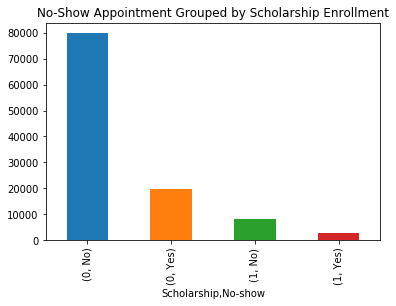

In [28]:
# Here we attempt to examine no-show outcome based on scholarship status of the patients
df_noshow = df.groupby('Scholarship')['No-show'].value_counts()

#Here we attempt to examine no-show outcome on barchart visualization
df_noshow.plot(kind='bar', title='No-Show Appointment Grouped by Scholarship Enrollment');

>From above visualization, the data of patient's no-show appointment is grouped by their scholarship enrollment and We observed (from the blue bar) that majority of patient that showed up for their appointments doesn't have a scholarship (Scholarship: 0 No-show: No)

>

>Pie chat below emphasies the significance of the number of patients that fall into the category of having no enrollment but still made it to their appointments.

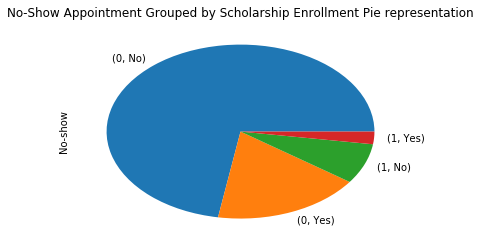

In [29]:
df_noshow.plot(kind='pie', title='No-Show Appointment Grouped by Scholarship Enrollment Pie representation');

### Research Question 2  Are patients aware/reminded of their medical appointments.

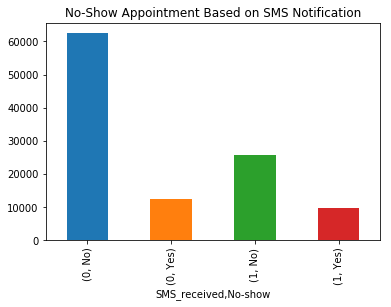

In [30]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
df_sms= df.groupby('SMS_received')['No-show'].value_counts()
df_sms.plot(kind='bar', title='No-Show Appointment Based on SMS Notification');

>The bar chart above provides a clear indication of no-show appointments. We observed from the blue bar that majority of patients did not receive sms notification and there not either aware or reminded of the appointments

<a id='conclusions'></a>
## Conclusions

> **Does scholarship enrollment make patients show up for scheduled appointment**: 
As clearly depicted in visualization titled "No-Show Appointment Grouped by Scholarship Enrollment", majority of patients that didn't show up for their appointments have scholarships which means they are enrolled in the Brasilian welfare program. There is need for further investigation into the scholarship program so as to identify how its negatively affects patients appointments - questions like are there hidden cost of enrollment?

>**Are patients aware/reminded of their medical appointments.**
This analysis shows direct relationship between no-show appointments and SMS received by patients.This gives ground to conclude that patients are not aware/reminded of their appointments and therefore the high rate of no-show observed.

>There is need to further investigate if the SMS was either not sent or failed to deliver

>**Limitation**
Data to verify if SMS_notification was actually sent or telephone numbers of patients was captured correctly to understand cause of low sms received is not available 



In [31]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0